In [1]:
!pip install qiskit
!pip install pylatexenc

# Transpile your Circuit

To execute your circuit on a quantum device, you need to transpile your circuit. The transpilation process takes into account multiple different aspects to bring your circuit on to the underlying architecture. This one function takes care of gate translation, mapping and routing, as well as circuit optimization. In this tak we will have a closer look on how to change the default parameters of the transpilation fucntion in order to play with the circuit a bit more. We will see how the circuit changes with repect to the arguments we give to the transpile function. However, our first taks is again to define a quantum circuit which we want to execute on hardware.

In [2]:
from qiskit import QuantumCircuit, transpile
from math import pi

In [3]:
qc = QuantumCircuit(7)

qc.h(range(7))
qc.s([1, 3, 5])
qc.rx(pi/3, 0)
qc.rx(-pi/3, 0)     # cancels at higher optimization levels
qc.t(2)
qc.tdg(2)           # cancels
qc.barrier()

qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.cx(3, 4)
qc.cz(5, 6)
qc.barrier()

qc.ccx(1, 3, 5)     # multi-controlled (unrolling/templates)
qc.cx(0, 6)         # long-range; routing will add SWAPs on constrained coupling maps
qc.barrier()

qc.swap(2, 3)
qc.swap(2, 3)       # back-to-back SWAPs -> cancels
qc.rz(pi/5, 4); qc.h(4); qc.rz(pi/7, 4); qc.h(4)  # H-RZ-H -> RX (basis-change opportunity)
qc.cx(4, 5)
qc.cx(4, 5)         # duplicate CX pair -> cancels without barriers
qc.barrier()

qc.sx(6)
qc.rx(pi/9, 6)
qc.rz(-pi/9, 6)



Maybe a small note here: The circuit has no particular meaning we just use it for now to highlight some structures within the circuit. But first of all let's print it out so that we can have a better look on what's going on.

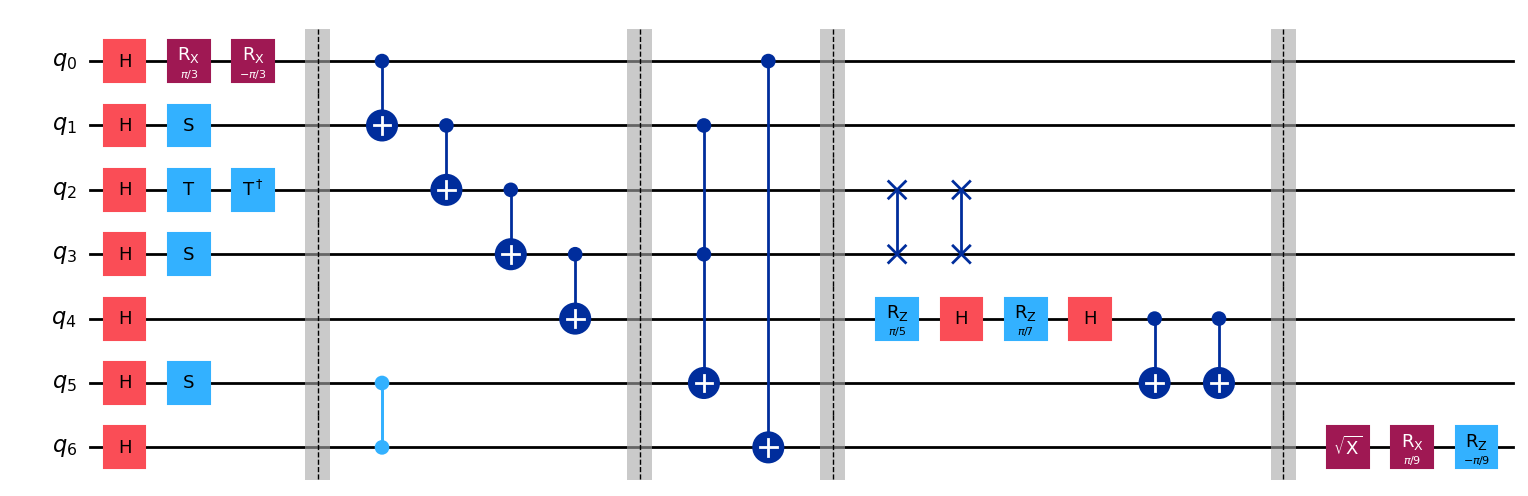

In [4]:
qc.draw('mpl')

Now we had a small loook at the circuit and it does directly what the code does. Now we need to "transpile" it. Transpilation is a process (compiler pass) in quantum computing which takes the circuit we want to execute and makes it ready for a specific device. A lot of different smaller passes are happening within the bigger picture and we will take a look at a few of those steps. However let's first transpile the circuit and print it again to analyze what has changed.

In [5]:
qc_transpiled = transpile(qc)

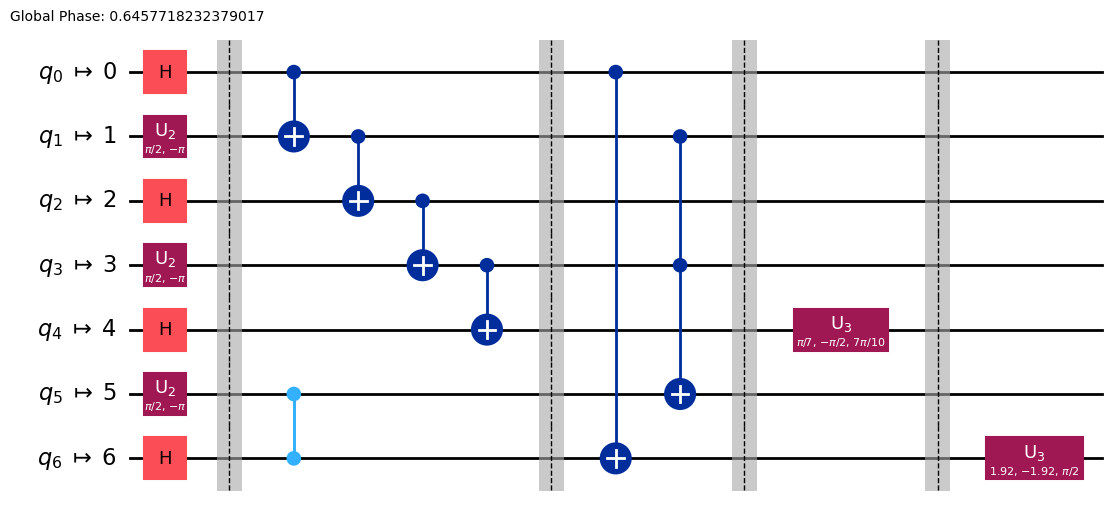

In [6]:
qc_transpiled.draw('mpl')

As we can see the circuit changed drastically. Some gates canceled out and others got moved or gates were merged into one. This is happening because the transpile function is using optimization methods. If we don't want to optimize anything we can set the optimization level to 0.

In [7]:
qc_transpiled_level_zero = transpile(qc, optimization_level=0)

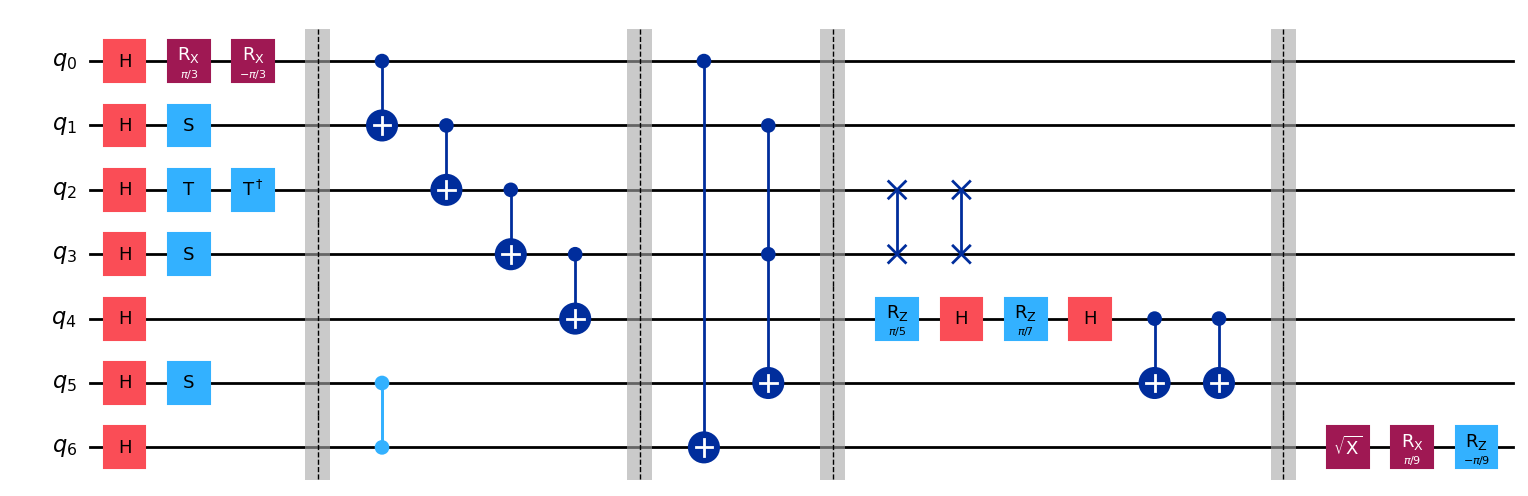

In [8]:
qc_transpiled_level_zero.draw('mpl')

There are optimization levels 0,1,2,3 and each of them is a bit different. So if you have any Circuit then play aorunf with the transpilation states.

# Coupling Map

IBM deals with Superconducting devices. And these devices have a set connectivity between qubits. 